# German Credit Risk

### Description:
The dataset contains 1000 entries with 10 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.

Age (numeric)
Sex (text: male, female)
Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
Housing (text: own, rent, or free)
Saving accounts (text - little, moderate, quite rich, rich)
Checking account (text - little, moderate,rich)
Credit amount (numeric, in DM)
Duration (numeric, in month)
Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")
     

In [2]:
data= pd.read_csv(r"C:\Users\Harjeet\Desktop\CU MDS Notes+Assignment\german_credit_data.csv")

## 1. Data Display

In [3]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [4]:
data.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
999,999,27,male,2,own,moderate,moderate,4576,45,car


In [5]:
data.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

### 1.1 Removing unnecessary colum

In [6]:
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [7]:
data.head(2)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV


### To display basic information about dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [9]:
data.shape

(1000, 9)

#### Counting null and duplicate values

In [10]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [11]:
print("Percentage of missing data column wise:")
print('-'*40)
for i in data.columns:
    print(f"{i} : {((data[i].isnull().sum())/data.shape[0])*100} %")


Percentage of missing data column wise:
----------------------------------------
Age : 0.0 %
Sex : 0.0 %
Job : 0.0 %
Housing : 0.0 %
Saving accounts : 18.3 %
Checking account : 39.4 %
Credit amount : 0.0 %
Duration : 0.0 %
Purpose : 0.0 %


In [12]:
data.duplicated().sum()

0

#### Checking the 5 point statistical summary

In [13]:
data.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


## 2. Handling null values

<AxesSubplot:xlabel='Saving accounts', ylabel='count'>

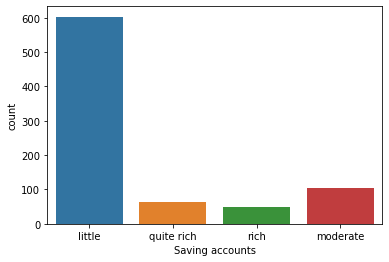

In [14]:
sns.countplot(data['Saving accounts'])

#### The above plot shows that Savings account has more people with little funds.

<AxesSubplot:xlabel='Checking account', ylabel='count'>

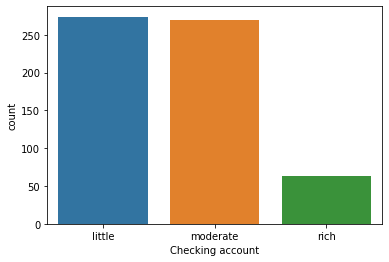

In [15]:
sns.countplot(data['Checking account'])

#### The above plot shows that checking account has equal number of people with little and moderate funds.

In [16]:
from scipy.stats import skew # to imports stats function

In [17]:
data.skew()

Age              1.020739
Job             -0.374295
Credit amount    1.949628
Duration         1.094184
dtype: float64

#### The above are the values of skewness for different numerical columns

In [18]:
data['Saving accounts'].fillna('little',inplace=True)

##### Since savings account has more people with little funds hence we replace null values with little 

In [19]:
data['Saving accounts'].isnull().sum()

0

##### Since savings account has equal number of people with moderate and little funds we will equally replace these values

In [20]:
ca = data['Checking account']
ca1 = ca[:501]
ca2 = ca[501:]

In [21]:
ca1.isnull().sum()

197

In [22]:
ca2.isnull().sum()

197

In [23]:
ca1.fillna('little',inplace=True)
ca2.fillna('moderate',inplace=True)
ca_new = pd.concat([ca1,ca2],axis=0)

In [24]:
ca_new.isnull().sum()

0

In [25]:
data['Checking Account']=ca_new

In [26]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Checking Account
0,67,male,2,own,little,little,1169,6,radio/TV,little
1,22,female,2,own,little,moderate,5951,48,radio/TV,moderate
2,49,male,1,own,little,little,2096,12,education,little
3,45,male,2,free,little,little,7882,42,furniture/equipment,little
4,53,male,2,free,little,little,4870,24,car,little
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,moderate,1736,12,furniture/equipment,moderate
996,40,male,3,own,little,little,3857,30,car,little
997,38,male,2,own,little,moderate,804,12,radio/TV,moderate
998,23,male,2,free,little,little,1845,45,radio/TV,little


In [27]:
data.drop(columns=['Checking account','Checking account'],inplace=True)

In [28]:
data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Credit amount       0
Duration            0
Purpose             0
Checking Account    0
dtype: int64

#### Correlation plot for numerical columns

<AxesSubplot:>

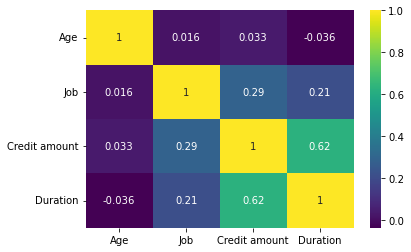

In [29]:
sns.heatmap(data.corr(),annot=True,cmap='viridis')

#### Above plot shows that duration and credit amount has high positive correlation and age and duration have very little negative correlation

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Job'}>],
       [<AxesSubplot:title={'center':'Credit amount'}>,
        <AxesSubplot:title={'center':'Duration'}>]], dtype=object)

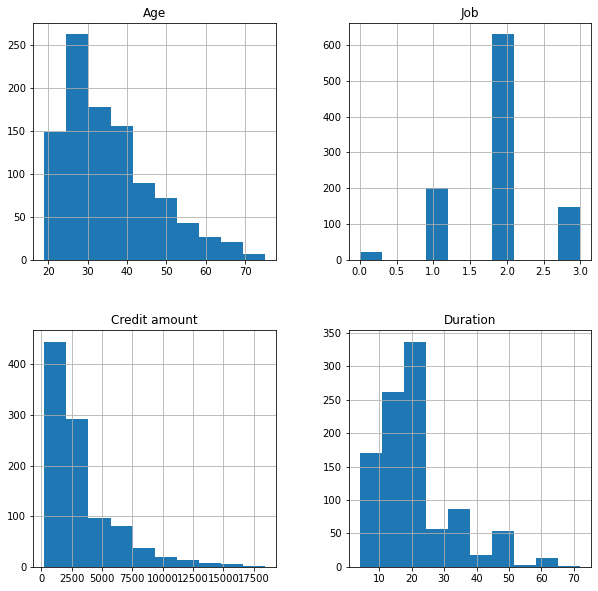

In [30]:
data.hist(figsize=(10,10))

#### Above histogram plots show the skewness we calculated above and verifies it.

<AxesSubplot:xlabel='Sex', ylabel='count'>

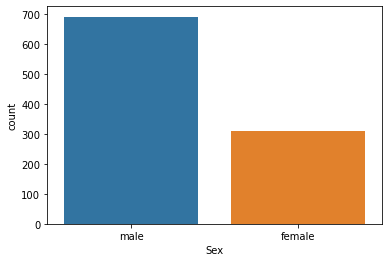

In [31]:
sns.countplot(data['Sex'])

#### Males are taking more loan than females

<AxesSubplot:xlabel='Sex', ylabel='Credit amount'>

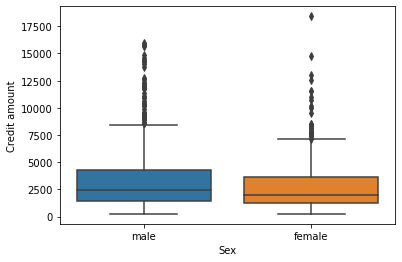

In [32]:
sns.boxplot(x=data['Sex'],y=data['Credit amount'])

#### Males and females are taking the same amount of credit/

<AxesSubplot:xlabel='Job', ylabel='Credit amount'>

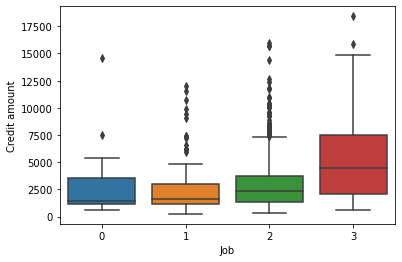

In [33]:
sns.boxplot(x=data['Job'],y=data['Credit amount'])

#### People with job title 3 i.e. highly skilled take more loan as they can repay it

<AxesSubplot:xlabel='Sex', ylabel='Duration'>

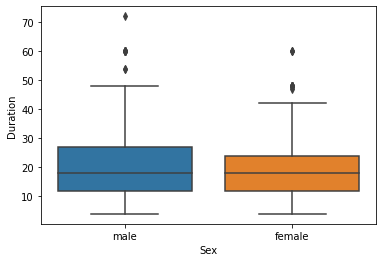

In [34]:
sns.boxplot(x=data['Sex'],y=data['Duration'])

#### Males and females take loan for almost same duration

In [35]:
data['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

<AxesSubplot:xlabel='Purpose', ylabel='count'>

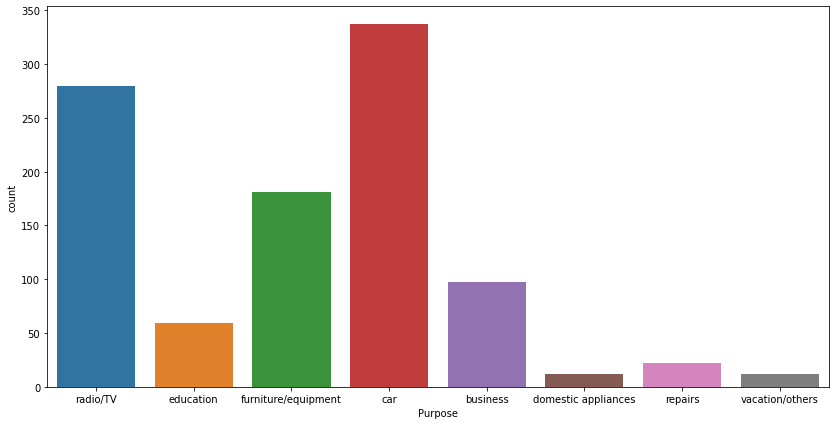

In [36]:
plt.figure(figsize=(14,7))
sns.countplot(data['Purpose'])


#### People are taking more loan for cars and tv

<AxesSubplot:xlabel='Housing', ylabel='Credit amount'>

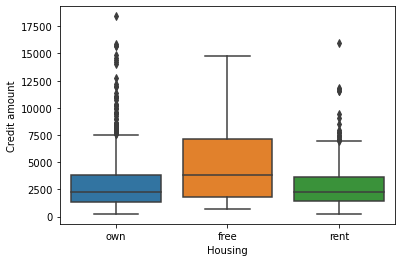

In [37]:
sns.boxplot(x=data['Housing'],y=data['Credit amount'])

#### People living in free house taking more loan since they might now have house mortgages

### Dropping columns which are encoded

### Encoding the categorical columns

In [38]:
from sklearn.preprocessing import OneHotEncoder
data['Housing']=data['Housing'].astype('category')
data['Housing_n']=data['Housing'].cat.codes

data['Sex']=data['Sex'].astype('category')
data['Sex_n']=data['Sex'].cat.codes

data['Saving accounts']=data['Saving accounts'].astype('category')
data['Savings_Account_n']=data['Saving accounts'].cat.codes

data['Purpose']=data['Purpose'].astype('category')
data['Purpose_n']=data['Purpose'].cat.codes

data['Checking Account']=data['Checking Account'].astype('category')
data['Checking_Account_n']=data['Checking Account'].cat.codes


In [39]:
data

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Checking Account,Housing_n,Sex_n,Savings_Account_n,Purpose_n,Checking_Account_n
0,67,male,2,own,little,1169,6,radio/TV,little,1,1,0,5,0
1,22,female,2,own,little,5951,48,radio/TV,moderate,1,0,0,5,1
2,49,male,1,own,little,2096,12,education,little,1,1,0,3,0
3,45,male,2,free,little,7882,42,furniture/equipment,little,0,1,0,4,0
4,53,male,2,free,little,4870,24,car,little,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,1736,12,furniture/equipment,moderate,1,0,0,4,1
996,40,male,3,own,little,3857,30,car,little,1,1,0,1,0
997,38,male,2,own,little,804,12,radio/TV,moderate,1,1,0,5,1
998,23,male,2,free,little,1845,45,radio/TV,little,0,1,0,5,0


In [40]:
data.drop(columns=['Sex','Housing','Saving accounts','Checking Account','Purpose'],axis=1,inplace=True)

In [41]:
data

,Age,Job,Credit amount,Duration,Housing_n,Sex_n,Savings_Account_n,Purpose_n,Checking_Account_n
0,67,2,1169,6,1,1,0,5,0
1,22,2,5951,48,1,0,0,5,1
2,49,1,2096,12,1,1,0,3,0
3,45,2,7882,42,0,1,0,4,0
4,53,2,4870,24,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,1,0,0,4,1
996,40,3,3857,30,1,1,0,1,0
997,38,2,804,12,1,1,0,5,1
998,23,2,1845,45,0,1,0,5,0


In [42]:
df_features = data.drop(['Credit amount'], axis=1)
df_label = data['Credit amount']

### Scaling the data

In [43]:
from sklearn.preprocessing import StandardScaler
standardized = StandardScaler()
standardized.fit(df_features)

StandardScaler()

In [44]:
scaled_data = standardized.transform(df_features)
scaled_data

array([[ 2.76645648,  0.14694918, -1.23647786, ..., -0.4634091 ,
         1.07326286, -0.97649891],
       [-1.19140394,  0.14694918,  2.24819436, ..., -0.4634091 ,
         1.07326286,  0.67299249],
       [ 1.18331231, -1.38377145, -0.73866754, ..., -0.4634091 ,
         0.06170503, -0.97649891],
       ...,
       [ 0.21583532,  0.14694918, -0.73866754, ..., -0.4634091 ,
         1.07326286,  0.67299249],
       [-1.10345149,  0.14694918,  1.9992892 , ..., -0.4634091 ,
         1.07326286, -0.97649891],
       [-0.75164167,  0.14694918,  1.9992892 , ...,  0.77897455,
        -0.9498528 ,  0.67299249]])

In [45]:
scaled_data.shape

(1000, 8)

### Applying PCA on the scaled data

In [46]:
X = data.iloc[:, 1:].values
y = data['Credit amount'].values

In [95]:
for i in range(0,1000):
    if df_label[i]>0 and df_label[i]<=5000:
        df_label[i] = 1
    elif df_label[i]>5000 and df_label[i]<=10000:
        df_label[i] = 2
    elif df_label[i]>10000 and df_label[i]<=15000:
        df_label[i] = 3
    elif df_label[i]>15000 and df_label[i]<20000:
        df_label[i] = 4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

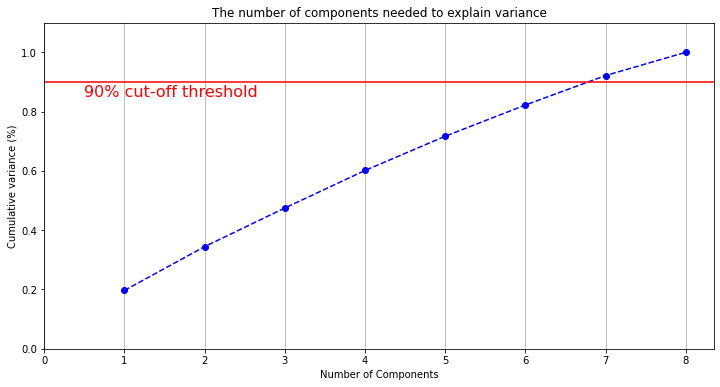

In [61]:
pca = PCA().fit(scaled_data)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 9, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 9, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [58]:
pca.explained_variance_ratio_

array([0.19676937, 0.14770458, 0.13023777, 0.12667016, 0.11540989,
       0.10539807, 0.09934507, 0.07846509])

In [65]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
    
x_pca = pca.fit_transform(scaled_data)
x_pca

array([[ 1.00083699,  1.90148799, -1.87057466],
       [-0.43716877, -2.15232066,  0.36142743],
       [ 0.18070777,  1.60615877, -1.3839129 ],
       ...,
       [ 0.14489704,  0.59518162, -0.49836724],
       [ 1.49171107, -1.56499328, -0.97056016],
       [ 0.94738   , -1.20845425,  1.69073059]])

In [63]:
x_pca.shape

(1000, 4)

In [68]:
x_pca

array([[ 1.00083699,  1.90148799, -1.87057466],
       [-0.43716877, -2.15232066,  0.36142743],
       [ 0.18070777,  1.60615877, -1.3839129 ],
       ...,
       [ 0.14489704,  0.59518162, -0.49836724],
       [ 1.49171107, -1.56499328, -0.97056016],
       [ 0.94738   , -1.20845425,  1.69073059]])

#### Projecting three components on 3D Plot

In [73]:
x_pca_df = pd.DataFrame(x_pca)

In [99]:
new_pca_df =pd.concat([x_pca_df,df_label],axis=1)

In [100]:
fig = px.scatter_3d(new_pca_df, x=0, y=1, z=2, color='Credit amount')
fig.show()

<IPython.core.display.Javascript object>

### Projecting two components each on 2D plot

Text(0, 0.5, 'Second Principal Component')

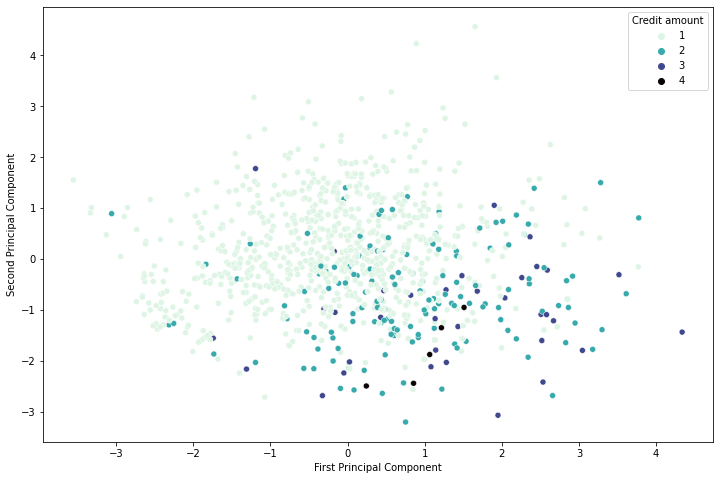

In [103]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x_pca[:,0], x_pca[:,1],hue = data['Credit amount'], palette = 'mako_r')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Third Principal Component')

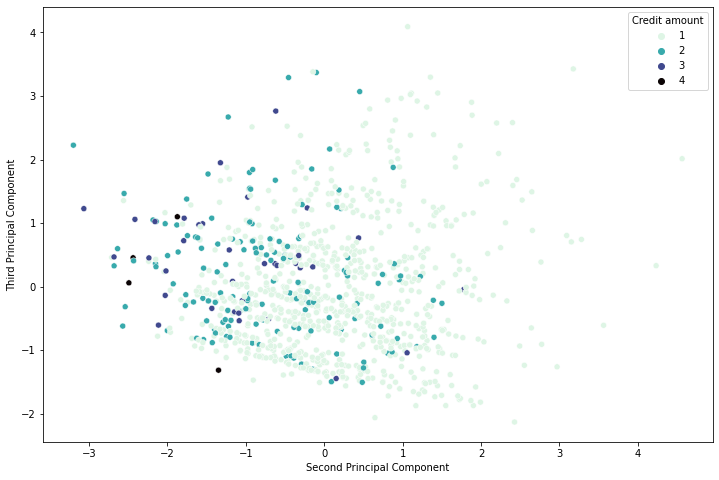

In [104]:
ax = plt.figure(figsize = (12,8))
sns.scatterplot(x_pca[:,1], x_pca[:,2],hue = data['Credit amount'], palette = 'mako_r' )
plt.xlabel('Second Principal Component')
plt.ylabel('Third Principal Component')

Text(0, 0.5, 'First Principal Component')

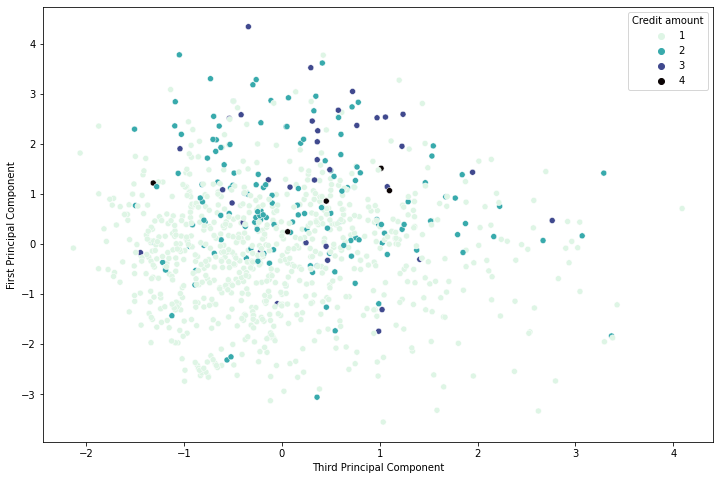

In [108]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(x_pca[:,2], x_pca[:,0],hue = data['Credit amount'], palette = 'mako_r' )
plt.xlabel('Third Principal Component')
plt.ylabel('First Principal Component')

In [109]:
df_pc = pd.DataFrame(pca.components_, columns = df_features.columns)

In [110]:
df_pc

,Age,Job,Duration,Housing_n,Sex_n,Savings_Account_n,Purpose_n,Checking_Account_n
0,0.442133,0.314557,0.344417,-0.577426,0.457223,-0.074463,-0.187705,0.060818
1,0.493836,-0.530272,-0.576173,-0.164068,0.153366,0.264374,0.037950,0.145565
2,-0.127929,0.100843,0.191066,0.113264,-0.050449,0.688548,-0.339456,0.576416


Text(114.0, 0.5, 'Principal Components')

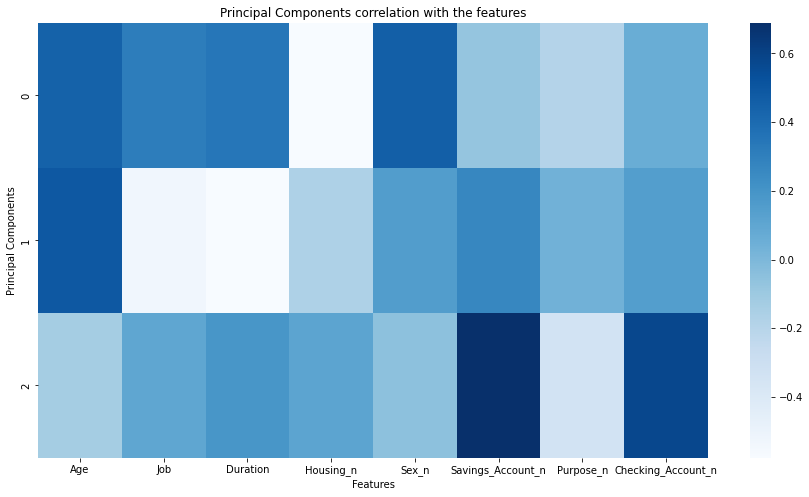

In [111]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_pc, cmap = 'Blues')
plt.title('Principal Components correlation with the features')
plt.xlabel('Features')
plt.ylabel('Principal Components')
     

## Naive Bayes on Original Data

In [238]:
x_train_o,x_test_o,y_train_o,y_test_o = train_test_split(df_features,df_label,test_size=0.2)
print(x_train_o.shape,y_train_o.shape,y_test_o.shape,x_test_o.shape)

(800, 8) (800,) (200,) (200, 8)


In [239]:
nb.fit(x_train_o,y_train_o)

GaussianNB()

In [240]:
y_pred_o = nb.predict(x_test_o)
score_o_nb = accuracy_score(y_test_o, y_pred_o)
print('Model accuracy score: {0:0.4f}'. format(score_o_nb))

Model accuracy score: 0.7650


## Naive Bayes on PCA data

In [116]:
new_x = new_pca_df.iloc[:,0:3]
new_y = new_pca_df.iloc[:,3]

In [119]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(new_x,new_y,test_size=0.2)
print(x_train.shape,y_train.shape,y_test.shape,x_test.shape)

(800, 3) (800,) (200,) (200, 3)


In [120]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [121]:
y_pred = nb.predict(x_test)

In [241]:
from sklearn.metrics import accuracy_score
score_pc_nb = accuracy_score(y_test, y_pred)
print('Model accuracy score: {0:0.4f}'. format(score_pc_nb))

Model accuracy score: 0.8000


## Decision Tree on PCA data

In [232]:
clf1 = DecisionTreeClassifier(max_depth =3, random_state = 42)

clf1.fit(x_train, y_train)
y_pred_dt_p = clf1.predict(x_test)

In [242]:
score_pc_dt = accuracy_score(y_test, y_pred_dt_p)
print('Model accuracy score: {0:0.4f}'. format(score_pc_dt))

Model accuracy score: 0.8250


## Performing LDA

### Scaling the data

In [133]:
from sklearn.preprocessing import StandardScaler
scaled_data_lda = StandardScaler().fit_transform(df_features)

In [134]:
scaled_data_lda

array([[ 2.76645648,  0.14694918, -1.23647786, ..., -0.4634091 ,
         1.07326286, -0.97649891],
       [-1.19140394,  0.14694918,  2.24819436, ..., -0.4634091 ,
         1.07326286,  0.67299249],
       [ 1.18331231, -1.38377145, -0.73866754, ..., -0.4634091 ,
         0.06170503, -0.97649891],
       ...,
       [ 0.21583532,  0.14694918, -0.73866754, ..., -0.4634091 ,
         1.07326286,  0.67299249],
       [-1.10345149,  0.14694918,  1.9992892 , ..., -0.4634091 ,
         1.07326286, -0.97649891],
       [-0.75164167,  0.14694918,  1.9992892 , ...,  0.77897455,
        -0.9498528 ,  0.67299249]])

In [135]:
scaled_data_lda.shape

(1000, 8)

In [141]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit_transform(scaled_data_lda,df_label)  

In [142]:
lda.explained_variance_ratio_

array([0.96932276, 0.02202086, 0.00865638])

In [157]:
X_lda

array([[-1.12464995, -0.40130658, -0.33092512],
       [ 2.18826498, -1.37154379,  1.02743035],
       [-1.0346962 ,  0.05388664, -0.90231325],
       ...,
       [-0.82050406, -0.66115339,  0.366434  ],
       [ 2.00567409,  0.06465199,  1.45942453],
       [ 2.2044852 , -0.00645562,  0.17583188]])

In [160]:
X_lda_df = pd.DataFrame(X_lda)

In [161]:
new_lda_df = pd.concat([X_lda_df,df_label],axis=1)

##### Plotting the LDA components

In [162]:
fig = px.scatter_3d(new_lda_df, x=0, y=1, z=2, color='Credit amount')
fig.show()

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Second LDA Component')

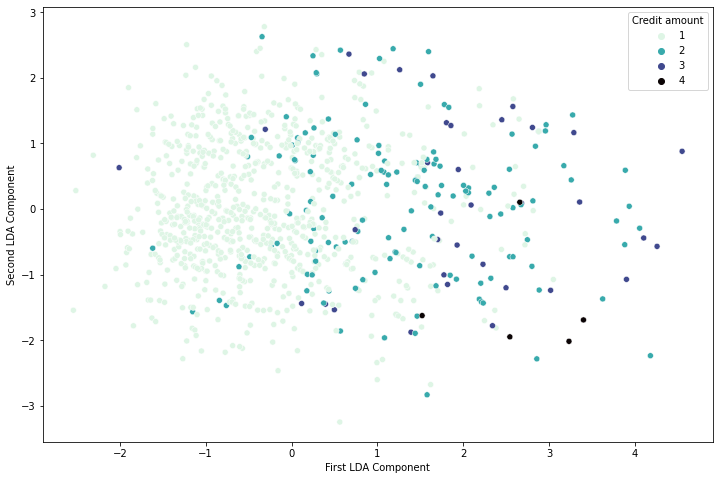

In [156]:
ax = plt.figure(figsize=(12,8))
sns.scatterplot(X_lda[:,0], X_lda[:,1],hue = data['Credit amount'], palette = 'mako_r' )
plt.xlabel('First LDA Component')
plt.ylabel('Second LDA Component')

## Decision Tree on original data

In [199]:
y_test_o.value_counts()


1    155
2     31
3     11
4      3
Name: Credit amount, dtype: int64

In [213]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)

clf.fit(x_train_o, y_train_o)
y_pred_dt_o = clf.predict(x_test_o)

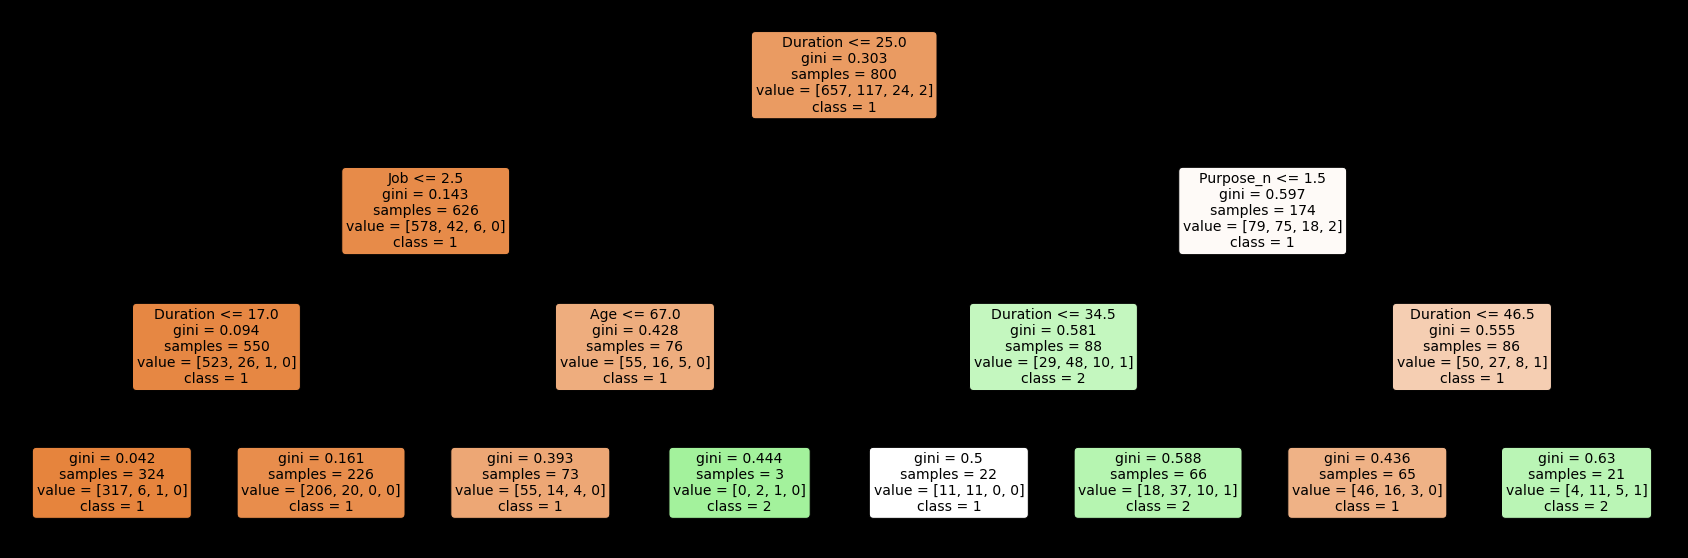

In [214]:
from sklearn import tree

import matplotlib.pyplot as plt

plt.figure(figsize=(30,10), facecolor ='k')

a = tree.plot_tree(clf,

                   feature_names = x_train_o.columns,

                   class_names = ['1','2','3','4'],

                   rounded = True,

                   filled = True,

                   fontsize=14)

plt.show()

In [247]:
score_o_dt = accuracy_score(y_test_o, y_pred_dt_o)
print('Model accuracy score: {0:0.4f}'. format(score_o_dt))

Model accuracy score: 0.7800


## Naive Bayes on LDA data

In [163]:
new_x_ld = new_lda_df.iloc[:,0:3]
new_y_ld = new_lda_df.iloc[:,3]
x_train_ld,x_test_ld,y_train_ld,y_test_ld = train_test_split(new_x_ld,new_y_ld,test_size=0.2)
print(x_train_ld.shape,y_train_ld.shape,y_test_ld.shape,x_test_ld.shape)

(800, 3) (800,) (200,) (200, 3)


In [245]:
nb.fit(x_train_ld,y_train_ld)
y_pred_ld = nb.predict(x_test_ld)
score_ld_nb = accuracy_score(y_test_ld, y_pred_ld)
print('Model accuracy score: {0:0.4f}'. format(score_ld_nb))

Model accuracy score: 0.8050


## Decision Tree on LDA data

In [234]:
clf.fit(x_train_ld, y_train_ld)
y_pred_dt_ld = clf.predict(x_test_ld)

In [246]:
score_ld_dt = accuracy_score(y_test_ld, y_pred_dt_ld)
print('Model accuracy score: {0:0.4f}'. format(score_ld_dt))

Model accuracy score: 0.8150


In [267]:
r = [score_o_nb,score_o_dt,score_pc_nb,score_pc_dt,score_ld_nb,score_ld_dt]
lb = ['NB Original Data','DT Original Data','NB PCA','DT PCA','NB LDA','DT LDA']
result = pd.DataFrame([r],columns=lb,index=['Score'])

In [268]:
result

,NB Original Data,DT Original Data,NB PCA,DT PCA,NB LDA,DT LDA
Score,0.765,0.78,0.8,0.825,0.805,0.815


# Inference

In this lab, we have tried to gain the knowledge about data and its variables, further we did some preprocessing to the data in order to bring it into more analyst friendly mode, laterly we implemented various graphs using various libraries in order to get valuable insights, furthermore, we implemented and evaluated various classification models to get high accuracy in terms of predicting breast cancer with that we perform dimensionality reduction which can help the banks to predict credit amount for the customers.

We further applied one parametric and one non-parametric model to each kind of data and compare the results. Dimensionality reduction with PCA and applying Decision Tree gave the best result.